<a href="https://colab.research.google.com/github/mudesir/DS-Unit-2-Applied-Modeling/blob/master/Unit_2_Build_Mudesir_Suleyman1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ROC-AUC

## ROC

When you have a **binary classification** problem, the ROC is a good way to decide what probability threshold you should use when making your predictions. 

Why? Because it let's you see what happens to your **True Positive Rate** and your **False Positive Rate** when you adjust that threshold.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving hotel_reserve.zip to hotel_reserve.zip


## Import Data / EDA

In [ ]:
data = pd.read_csv('hotel_reserve.zip')
# X = pd.DataFrame(data['data'], columns=data['feature_name'])
# y = pd.Series(data['target'], name='is_canceled')

In [ ]:
import pandas as pd
import numpy as np

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# change resrvation_status date to date 
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119390, dtype: datetime64[ns]

In [ ]:
# Split data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, train_size=0.8, test_size=0.2, random_state=42)
train.shape, test.shape


((95512, 32), (23878, 32))

In [ ]:
# Split train into train and val
train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=42)
train.shape, val.shape ,test.shape

((76409, 32), (19103, 32), (23878, 32))

In [ ]:
# # split train/val/test dataset depending on date
# train = data[data['reservation_status_date'].dt.year <= 2016]
# val =  data[(data['reservation_status_date'].dt.year == 2017) & 
#             (data['reservation_status_date'].dt.month <= 3)]
# test = data[(data['reservation_status_date'].dt.year == 2017) & 
#             (data['reservation_status_date'].dt.month > 3)]
          
# train.shape, val.shape, test.shape          

((82907, 32), (14935, 32), (21548, 32))

In [ ]:
def wrangle(X):
  X=X.copy()
  # drop with high cardinality and with high nan value
  X = X.drop(columns=['reservation_status', 'country', 'agent', 'company', 
                      'reservation_status', 'adr'])
  X = X.dropna()
  return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [ ]:
# print shape
print('Train shape: ', train.shape)
print('Val shape: ', val.shape)
print('Test shape: ', test.shape)


Train shape:  (76405, 27)
Val shape:  (19103, 27)
Test shape:  (23878, 27)


In [ ]:
# get target and features
target = 'is_canceled'
features = train.drop(columns=[target])
features = features.select_dtypes(include='number').columns.tolist()

In [ ]:
features

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [ ]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 1.7MB/s 


In [ ]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

#test = test.drop(columns=[target])
#X_test = test
# fit on train
pipeline.fit(X_train, y_train)

# score on val
print('Logistic Regression Validation Accuracy :', pipeline.score(X_val, y_val))

# predict on test
#y_pred = pipeline.predict(X_test)

Logistic Regression Validation Accuracy : 0.7304088363084332


In [ ]:
%matplotlib inline
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


pipeline_dtc = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    DecisionTreeClassifier(max_depth=3)
)

pipeline_dtc.fit(X_train, y_train)
print('Validation Accuracy', pipeline_dtc.score(X_val, y_val))

Validation Accuracy 0.6980578966654453


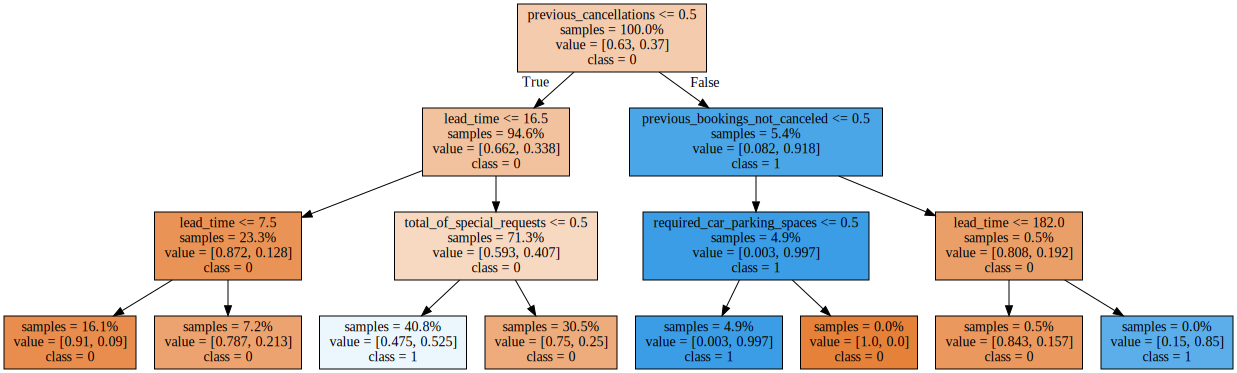

In [ ]:
# plot tree
import graphviz
from sklearn.tree import export_graphviz

model = pipeline_dtc.named_steps['decisiontreeclassifier']
encoder = pipeline_dtc.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model, 
                           out_file=None,
                           max_depth=3,
                           feature_names=encoded_columns,
                           class_names=y_train.unique().astype(str),
                           impurity=False,
                           filled=True,
                           proportion=True)
display(graphviz.Source(dot_data))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
)
# fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8300266973773753
